In [2]:

import pandas as pd

r = pd.read_csv( 'ratings.csv' )
tr = pd.read_csv( 'to_read.csv' )
b = pd.read_csv( 'books_enriched.csv' )

t = pd.read_csv( 'tags.csv' )
bt = pd.read_csv( 'book_tags.csv')


In [6]:
b_titles = b['title'].unique()
len(b_titles), len(b)

(9964, 10000)

In [20]:
b_titles_not_nan = b['title'].dropna()
len(b_titles_not_nan), len(b)

(10000, 10000)

In [8]:
b_otitles = b['original_title'].unique()
len(b_otitles), len(b)

(9275, 10000)

In [12]:
b_otitles_not_nan = b['original_title'].dropna()
len(b_otitles_not_nan), len(b)

(9415, 10000)

In [19]:
# stampa original_title e title degli gli elementi che hanno duplicati di original_title in b
df = b[b["original_title"].notna()]
duplicates = df[df.duplicated(['original_title'], keep=False)]
dp=[]
for index, row in duplicates.iterrows():
    dp.append((row['original_title'], row['title']))
dp.sort()
for d in dp:
    print(d)
print(len(dp))

(' ', 'Brothers Majere (Dragonlance: Preludes, #3)')
(' ', 'Eleanor of Aquitaine: A Life ')
(' ', 'If You Take a Mouse to School')
(' ', 'Sea of Swords (Forgotten Realms: Paths of Darkness, #4; Legend of Drizzt, #13)')
(' ', 'Shadows of the Empire (Star Wars)')
('A Clash of Kings', 'A Clash of Kings  (A Song of Ice and Fire, #2)')
('A Clash of Kings', 'A Game of Thrones / A Clash of Kings (A Song of Ice and Fire, #1-2)')
('A Grief Observed', 'A Grief Observed')
('A Grief Observed', 'The Screwtape Letters')
('Abandon', 'Abandon')
('Abandon', 'Abandon (Abandon, #1)')
('After', 'After')
('After', 'After (After, #1)')
('Arcadia', 'Arcadia')
('Arcadia', 'Arcadia')
('At the Mountains of Madness', 'At the Mountains of Madness')
('At the Mountains of Madness', 'At the Mountains of Madness and Other Tales of Terror')
('Be Careful What You Wish For', 'Be Careful What You Wish For')
('Be Careful What You Wish For', 'Be Careful What You Wish For (The Clifton Chronicles, #4)')
('Beautiful Redemptio

In [21]:
# crea una nuova colonna in b che si chiama new_title che contiene original_title se non è NaN, oppure se non ha duplicati, altrimenti title
b['new_title'] = b.apply(lambda row: row['original_title'] if pd.notna(row['original_title']) and len(b[b['original_title'] == row['original_title']]) == 1 else row['title'], axis=1)


In [22]:
b

,Unnamed: 0,index,authors,average_rating,best_book_id,book_id,books_count,description,genres,goodreads_book_id,...,ratings_4,ratings_5,ratings_count,small_image_url,title,work_id,work_ratings_count,work_text_reviews_count,authors_2,new_title
0,0,0,['Suzanne Collins'],4.34,2767052,1,272,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,"['young-adult', 'fiction', 'fantasy', 'science...",2767052,...,1481305,2706317,4780653,https://images.gr-assets.com/books/1447303603s...,"The Hunger Games (The Hunger Games, #1)",2792775,4942365,155254,['Suzanne Collins'],The Hunger Games
1,1,1,"['J.K. Rowling', 'Mary GrandPré']",4.44,3,2,491,Harry Potter's life is miserable. His parents ...,"['fantasy', 'fiction', 'young-adult', 'classics']",3,...,1156318,3011543,4602479,https://images.gr-assets.com/books/1474154022s...,Harry Potter and the Sorcerer's Stone (Harry P...,4640799,4800065,75867,"['J.K. Rowling', 'Mary GrandPré']",Harry Potter and the Philosopher's Stone
2,2,2,['Stephenie Meyer'],3.57,41865,3,226,About three things I was absolutely positive.\...,"['young-adult', 'fantasy', 'romance', 'fiction...",41865,...,875073,1355439,3866839,https://images.gr-assets.com/books/1361039443s...,"Twilight (Twilight, #1)",3212258,3916824,95009,['Stephenie Meyer'],"Twilight (Twilight, #1)"
3,3,3,['Harper Lee'],4.25,2657,4,487,The unforgettable novel of a childhood in a sl...,"['classics', 'fiction', 'historical-fiction', ...",2657,...,1001952,1714267,3198671,https://images.gr-assets.com/books/1361975680s...,To Kill a Mockingbird,3275794,3340896,72586,['Harper Lee'],To Kill a Mockingbird
4,4,4,['F. Scott Fitzgerald'],3.89,4671,5,1356,Alternate Cover Edition ISBN: 0743273567 (ISBN...,"['classics', 'fiction', 'historical-fiction', ...",4671,...,936012,947718,2683664,https://images.gr-assets.com/books/1490528560s...,The Great Gatsby,245494,2773745,51992,['F. Scott Fitzgerald'],The Great Gatsby
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,9980,['[Jeffery Deaver]'],3.98,106312,9981,58,"A high-school girl in Harlem, Geneva Settle, i...","['mystery', 'thriller', 'fiction', 'crime', 's...",106312,...,5155,3643,10188,https://images.gr-assets.com/books/1328407138s...,"The Twelfth Card (Lincoln Rhyme, #6)",29083,12134,495,['[Jeffery Deaver]'],The Twelfth Card
9996,9996,9981,['[Karen Marie Moning]'],4.18,12444298,9982,1,In Karen Marie Moning’s latest installment of ...,"['fantasy', 'paranormal', 'romance', 'fiction'...",12444298,...,4779,6407,11570,https://images.gr-assets.com/books/1435195536s...,"Feverborn (Fever, #8)",21900571,14194,1891,['[Karen Marie Moning]'],Feverborn
9997,9997,9984,"['[Steve Perry', 'Tom Clancy', 'Steve Pieczeni...",3.69,19688,9985,24,"In the year 2000, computers are the new superp...","['fiction', 'thriller', 'books', 'mystery', 's...",19688,...,2456,2068,7693,https://s.gr-assets.com/assets/nophoto/book/50...,"Breaking Point (Tom Clancy's Net Force, #4)",17028947,7825,26,"['[Steve Perry', 'Tom Clancy', 'Steve Pieczeni...",Tom Clancy's Net Force: Breaking Point
9998,9998,9986,['[Iris Johansen]'],4.12,8087038,9987,29,A CIA agent's two-year-old child was stolen in...,"['mystery', 'fiction', 'thriller', 'suspense',...",8087038,...,3957,4436,10129,https://s.gr-assets.com/assets/nophoto/book/50...,"Chasing The Night (Eve Duncan, #11; Catherine ...",12823536,10964,411,['[Iris Johansen]'],Chasing The Night


### Ratings

In [4]:
r.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


Ratings are sorted chronologically, oldest first.

In [5]:
len(r)

5976479

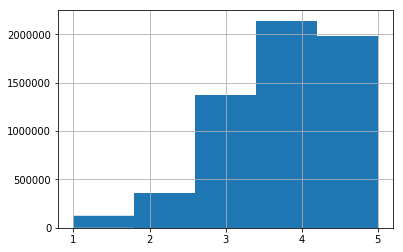

In [4]:
r.rating.hist( bins = 5 )

It appears that 4 is the most popular rating. There are relatively few ones and twos.

### To read
These are the books users marked "to read".


In [6]:
tr.head()

,user_id,book_id
0,9,8
1,15,398
2,15,275
3,37,7173
4,34,380


In [7]:
len(tr)

912705

Most books have been marked to read by somebody. Majority of the users have some books marked to read.

In [8]:
len(tr.book_id.unique())

9986

In [9]:
len(tr.user_id.unique())

48871

### Books

In [10]:
b.head()

,Unnamed: 0,index,authors,average_rating,best_book_id,book_id,books_count,description,genres,goodreads_book_id,...,ratings_3,ratings_4,ratings_5,ratings_count,small_image_url,title,work_id,work_ratings_count,work_text_reviews_count,authors_2
0,0,0,['Suzanne Collins'],4.34,2767052,1,272,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,"['young-adult', 'fiction', 'fantasy', 'science...",2767052,...,560092,1481305,2706317,4780653,https://images.gr-assets.com/books/1447303603s...,"The Hunger Games (The Hunger Games, #1)",2792775,4942365,155254,['Suzanne Collins']
1,1,1,"['J.K. Rowling', 'Mary GrandPré']",4.44,3,2,491,Harry Potter's life is miserable. His parents ...,"['fantasy', 'fiction', 'young-adult', 'classics']",3,...,455024,1156318,3011543,4602479,https://images.gr-assets.com/books/1474154022s...,Harry Potter and the Sorcerer's Stone (Harry P...,4640799,4800065,75867,"['J.K. Rowling', 'Mary GrandPré']"
2,2,2,['Stephenie Meyer'],3.57,41865,3,226,About three things I was absolutely positive.\...,"['young-adult', 'fantasy', 'romance', 'fiction...",41865,...,793319,875073,1355439,3866839,https://images.gr-assets.com/books/1361039443s...,"Twilight (Twilight, #1)",3212258,3916824,95009,['Stephenie Meyer']
3,3,3,['Harper Lee'],4.25,2657,4,487,The unforgettable novel of a childhood in a sl...,"['classics', 'fiction', 'historical-fiction', ...",2657,...,446835,1001952,1714267,3198671,https://images.gr-assets.com/books/1361975680s...,To Kill a Mockingbird,3275794,3340896,72586,['Harper Lee']
4,4,4,['F. Scott Fitzgerald'],3.89,4671,5,1356,Alternate Cover Edition ISBN: 0743273567 (ISBN...,"['classics', 'fiction', 'historical-fiction', ...",4671,...,606158,936012,947718,2683664,https://images.gr-assets.com/books/1490528560s...,The Great Gatsby,245494,2773745,51992,['F. Scott Fitzgerald']


Books are sorted by their popularity, as measured by number of ratings (overall, not in this dataset).

In [11]:
len(b)

10000

### User and book IDs

In [12]:
r.user_id.max()

53424

In [13]:
r.book_id.max()

10000

The IDs are contiguous.

In [14]:
assert( len( r.user_id.unique()) == r.user_id.max())
assert( len( r.book_id.unique()) == r.book_id.max())

### Reviews per book

Most books have a few hundred reviews, but some have as few as eight.

In [15]:
reviews_per_book = r.groupby( 'book_id' ).book_id.apply( lambda x: len( x ))
reviews_per_book.describe()

count    10000.000000
mean       597.647900
std       1267.289788
min          8.000000
25%        155.000000
50%        248.000000
75%        503.000000
max      22806.000000
Name: book_id, dtype: float64

In [16]:
reviews_per_book.sort_values().head( 10 )

book_id
7803     8
9345    11
9486    24
1935    33
9315    36
9553    41
8181    45
9479    48
9260    48
9705    50
Name: book_id, dtype: int64

### Reviews per user

All users have at least 19 reviews.

In [17]:
reviews_per_user = r.groupby( 'user_id' ).user_id.apply( lambda x: len( x ))
reviews_per_user.describe()

count    53424.000000
mean       111.868804
std         26.071224
min         19.000000
25%         96.000000
50%        111.000000
75%        128.000000
max        200.000000
Name: user_id, dtype: float64

In [18]:
reviews_per_user.sort_values().head( 10 )

user_id
34590    19
43675    20
40753    21
51725    21
32128    21
37640    22
16470    22
42736    22
48077    22
40299    22
Name: user_id, dtype: int64

### Tags

In [19]:
t.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [20]:
len(t)

34252

In [21]:
bt.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


Tag applications are sorted by goodreads_book_id ASC and by count DESC.

In [22]:
len(bt)

999912

Let us merge tag names into tag applications.

In [18]:
bt = bt.merge( t, on = 'tag_id' )

Why don't we merge book titles for good measure.

In [19]:
bt = bt.merge( b[[ 'goodreads_book_id', 'title']], on = 'goodreads_book_id' )

It appears that there are some negative tag counts. Let's fix this.

In [20]:
bt['count'].describe()

count    999912.000000
mean        208.869633
std        3501.265173
min          -1.000000
25%           7.000000
50%          15.000000
75%          40.000000
max      596234.000000
Name: count, dtype: float64

In [21]:
bt.loc[ bt['count'] < 0, 'count'] = 0

Sample some popular book tags.

In [22]:
bt.sample( 10, weights = 'count')

,goodreads_book_id,tag_id,count,tag_name,title
241800,43889,30574,54599,to-read,"Wizard's First Rule (Sword of Truth, #1)"
228600,40200,30574,23366,to-read,The Crimson Petal and the White
313500,79121,30574,7743,to-read,The Happy Prince
776294,10798416,30574,121685,to-read,The Statistical Probability of Love at First S...
910594,18143905,30574,83845,to-read,The Opposite of Loneliness: Essays and Stories
835194,13546173,30574,13744,to-read,The Assassin and the Underworld (Throne of Gla...
848194,15729539,30574,49908,to-read,NOS4A2
110800,13501,30574,11239,to-read,The Hedge Knight (The Hedge Knight Graphic Nov...
821894,13188676,30574,28294,to-read,"Ignite Me (Shatter Me, #3)"
524103,539282,7457,151,classics,Fences (The Century Cycle #6)


These are the most popular tags:

In [23]:
tag_counts = bt.groupby( 'tag_name' ).tag_name.count().sort_values( ascending = False )
tag_counts.head( 20 )

tag_name
to-read              9983
favorites            9881
owned                9858
books-i-own          9799
currently-reading    9776
library              9415
owned-books          9221
fiction              9097
to-buy               8692
kindle               8316
default              8239
ebook                8054
my-books             7561
audiobook            7242
ebooks               7203
wish-list            7192
my-library           7000
audiobooks           6862
i-own                6670
adult                6604
Name: tag_name, dtype: int64

In [24]:
workid_b = b["work_id"].unique()
len(workid_b)

10000

In [27]:
# controlla che tutti i work_id di b siano in r
workid_r = r["book_id"].unique()
len(workid_r)
set(workid_b) ==(set(workid_r))

False

In [30]:
bookid_b = b["book_id"].unique()
bookid_r = r["book_id"].unique()
set(bookid_b) ==(set(bookid_r))

True

In [31]:
bookid_b = b["goodreads_book_id"].unique()
bookid_r = r["book_id"].unique()
set(bookid_b) ==(set(bookid_r))

False

In [32]:
bookid_b = b["best_book_id"].unique()
bookid_r = r["book_id"].unique()
set(bookid_b) ==(set(bookid_r))

False

In [9]:
b

,Unnamed: 0,index,authors,average_rating,best_book_id,book_id,books_count,description,genres,goodreads_book_id,...,ratings_3,ratings_4,ratings_5,ratings_count,small_image_url,title,work_id,work_ratings_count,work_text_reviews_count,authors_2
0,0,0,['Suzanne Collins'],4.34,2767052,1,272,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,"['young-adult', 'fiction', 'fantasy', 'science...",2767052,...,560092,1481305,2706317,4780653,https://images.gr-assets.com/books/1447303603s...,"The Hunger Games (The Hunger Games, #1)",2792775,4942365,155254,['Suzanne Collins']
1,1,1,"['J.K. Rowling', 'Mary GrandPré']",4.44,3,2,491,Harry Potter's life is miserable. His parents ...,"['fantasy', 'fiction', 'young-adult', 'classics']",3,...,455024,1156318,3011543,4602479,https://images.gr-assets.com/books/1474154022s...,Harry Potter and the Sorcerer's Stone (Harry P...,4640799,4800065,75867,"['J.K. Rowling', 'Mary GrandPré']"
2,2,2,['Stephenie Meyer'],3.57,41865,3,226,About three things I was absolutely positive.\...,"['young-adult', 'fantasy', 'romance', 'fiction...",41865,...,793319,875073,1355439,3866839,https://images.gr-assets.com/books/1361039443s...,"Twilight (Twilight, #1)",3212258,3916824,95009,['Stephenie Meyer']
3,3,3,['Harper Lee'],4.25,2657,4,487,The unforgettable novel of a childhood in a sl...,"['classics', 'fiction', 'historical-fiction', ...",2657,...,446835,1001952,1714267,3198671,https://images.gr-assets.com/books/1361975680s...,To Kill a Mockingbird,3275794,3340896,72586,['Harper Lee']
4,4,4,['F. Scott Fitzgerald'],3.89,4671,5,1356,Alternate Cover Edition ISBN: 0743273567 (ISBN...,"['classics', 'fiction', 'historical-fiction', ...",4671,...,606158,936012,947718,2683664,https://images.gr-assets.com/books/1490528560s...,The Great Gatsby,245494,2773745,51992,['F. Scott Fitzgerald']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,9980,['[Jeffery Deaver]'],3.98,106312,9981,58,"A high-school girl in Harlem, Geneva Settle, i...","['mystery', 'thriller', 'fiction', 'crime', 's...",106312,...,2874,5155,3643,10188,https://images.gr-assets.com/books/1328407138s...,"The Twelfth Card (Lincoln Rhyme, #6)",29083,12134,495,['[Jeffery Deaver]']
9996,9996,9981,['[Karen Marie Moning]'],4.18,12444298,9982,1,In Karen Marie Moning’s latest installment of ...,"['fantasy', 'paranormal', 'romance', 'fiction'...",12444298,...,2308,4779,6407,11570,https://images.gr-assets.com/books/1435195536s...,"Feverborn (Fever, #8)",21900571,14194,1891,['[Karen Marie Moning]']
9997,9997,9984,"['[Steve Perry', 'Tom Clancy', 'Steve Pieczeni...",3.69,19688,9985,24,"In the year 2000, computers are the new superp...","['fiction', 'thriller', 'books', 'mystery', 's...",19688,...,2349,2456,2068,7693,https://s.gr-assets.com/assets/nophoto/book/50...,"Breaking Point (Tom Clancy's Net Force, #4)",17028947,7825,26,"['[Steve Perry', 'Tom Clancy', 'Steve Pieczeni..."
9998,9998,9986,['[Iris Johansen]'],4.12,8087038,9987,29,A CIA agent's two-year-old child was stolen in...,"['mystery', 'fiction', 'thriller', 'suspense',...",8087038,...,2127,3957,4436,10129,https://s.gr-assets.com/assets/nophoto/book/50...,"Chasing The Night (Eve Duncan, #11; Catherine ...",12823536,10964,411,['[Iris Johansen]']


In [23]:
b.rename( columns = { 'book_id': 'app_id'}, inplace = True )

In [24]:
b.columns

Index(['Unnamed: 0', 'index', 'authors', 'average_rating', 'best_book_id',
       'app_id', 'books_count', 'description', 'genres', 'goodreads_book_id',
       'image_url', 'isbn', 'isbn13', 'language_code',
       'original_publication_year', 'original_title', 'pages', 'publishDate',
       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5',
       'ratings_count', 'small_image_url', 'title', 'work_id',
       'work_ratings_count', 'work_text_reviews_count', 'authors_2',
       'new_title'],
      dtype='object')

In [25]:
b.drop( columns = [ 'Unnamed: 0', 'index',  'isbn', 'isbn13', 'language_code', 'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url', 'small_image_url' ], inplace = True )

In [26]:
b.drop( columns = [ 'work_id', 'best_book_id', 'goodreads_book_id', 'publishDate' ,'work_ratings_count', 'work_text_reviews_count'], inplace = True )

In [27]:
b

,authors,average_rating,app_id,books_count,description,genres,original_publication_year,original_title,pages,ratings_count,title,authors_2,new_title
0,['Suzanne Collins'],4.34,1,272,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,"['young-adult', 'fiction', 'fantasy', 'science...",2008.0,The Hunger Games,374.0,4780653,"The Hunger Games (The Hunger Games, #1)",['Suzanne Collins'],The Hunger Games
1,"['J.K. Rowling', 'Mary GrandPré']",4.44,2,491,Harry Potter's life is miserable. His parents ...,"['fantasy', 'fiction', 'young-adult', 'classics']",1997.0,Harry Potter and the Philosopher's Stone,309.0,4602479,Harry Potter and the Sorcerer's Stone (Harry P...,"['J.K. Rowling', 'Mary GrandPré']",Harry Potter and the Philosopher's Stone
2,['Stephenie Meyer'],3.57,3,226,About three things I was absolutely positive.\...,"['young-adult', 'fantasy', 'romance', 'fiction...",2005.0,Twilight,501.0,3866839,"Twilight (Twilight, #1)",['Stephenie Meyer'],"Twilight (Twilight, #1)"
3,['Harper Lee'],4.25,4,487,The unforgettable novel of a childhood in a sl...,"['classics', 'fiction', 'historical-fiction', ...",1960.0,To Kill a Mockingbird,324.0,3198671,To Kill a Mockingbird,['Harper Lee'],To Kill a Mockingbird
4,['F. Scott Fitzgerald'],3.89,5,1356,Alternate Cover Edition ISBN: 0743273567 (ISBN...,"['classics', 'fiction', 'historical-fiction', ...",1925.0,The Great Gatsby,200.0,2683664,The Great Gatsby,['F. Scott Fitzgerald'],The Great Gatsby
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,['[Jeffery Deaver]'],3.98,9981,58,"A high-school girl in Harlem, Geneva Settle, i...","['mystery', 'thriller', 'fiction', 'crime', 's...",2005.0,The Twelfth Card,816.0,10188,"The Twelfth Card (Lincoln Rhyme, #6)",['[Jeffery Deaver]'],The Twelfth Card
9996,['[Karen Marie Moning]'],4.18,9982,1,In Karen Marie Moning’s latest installment of ...,"['fantasy', 'paranormal', 'romance', 'fiction'...",2016.0,Feverborn,436.0,11570,"Feverborn (Fever, #8)",['[Karen Marie Moning]'],Feverborn
9997,"['[Steve Perry', 'Tom Clancy', 'Steve Pieczeni...",3.69,9985,24,"In the year 2000, computers are the new superp...","['fiction', 'thriller', 'books', 'mystery', 's...",2000.0,Tom Clancy's Net Force: Breaking Point,368.0,7693,"Breaking Point (Tom Clancy's Net Force, #4)","['[Steve Perry', 'Tom Clancy', 'Steve Pieczeni...",Tom Clancy's Net Force: Breaking Point
9998,['[Iris Johansen]'],4.12,9987,29,A CIA agent's two-year-old child was stolen in...,"['mystery', 'fiction', 'thriller', 'suspense',...",2010.0,Chasing The Night,362.0,10129,"Chasing The Night (Eve Duncan, #11; Catherine ...",['[Iris Johansen]'],Chasing The Night


In [55]:
b.drop( columns = [ 'new_title'], inplace = True )

In [28]:
b.rename( columns = { 'original_publication_year': 'year'}, inplace = True )

In [16]:
b.rename( columns = { 'title': 'new_title'}, inplace = True )

In [29]:
b

,authors,average_rating,app_id,books_count,description,genres,year,original_title,pages,ratings_count,title,authors_2,new_title
0,['Suzanne Collins'],4.34,1,272,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,"['young-adult', 'fiction', 'fantasy', 'science...",2008.0,The Hunger Games,374.0,4780653,"The Hunger Games (The Hunger Games, #1)",['Suzanne Collins'],The Hunger Games
1,"['J.K. Rowling', 'Mary GrandPré']",4.44,2,491,Harry Potter's life is miserable. His parents ...,"['fantasy', 'fiction', 'young-adult', 'classics']",1997.0,Harry Potter and the Philosopher's Stone,309.0,4602479,Harry Potter and the Sorcerer's Stone (Harry P...,"['J.K. Rowling', 'Mary GrandPré']",Harry Potter and the Philosopher's Stone
2,['Stephenie Meyer'],3.57,3,226,About three things I was absolutely positive.\...,"['young-adult', 'fantasy', 'romance', 'fiction...",2005.0,Twilight,501.0,3866839,"Twilight (Twilight, #1)",['Stephenie Meyer'],"Twilight (Twilight, #1)"
3,['Harper Lee'],4.25,4,487,The unforgettable novel of a childhood in a sl...,"['classics', 'fiction', 'historical-fiction', ...",1960.0,To Kill a Mockingbird,324.0,3198671,To Kill a Mockingbird,['Harper Lee'],To Kill a Mockingbird
4,['F. Scott Fitzgerald'],3.89,5,1356,Alternate Cover Edition ISBN: 0743273567 (ISBN...,"['classics', 'fiction', 'historical-fiction', ...",1925.0,The Great Gatsby,200.0,2683664,The Great Gatsby,['F. Scott Fitzgerald'],The Great Gatsby
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,['[Jeffery Deaver]'],3.98,9981,58,"A high-school girl in Harlem, Geneva Settle, i...","['mystery', 'thriller', 'fiction', 'crime', 's...",2005.0,The Twelfth Card,816.0,10188,"The Twelfth Card (Lincoln Rhyme, #6)",['[Jeffery Deaver]'],The Twelfth Card
9996,['[Karen Marie Moning]'],4.18,9982,1,In Karen Marie Moning’s latest installment of ...,"['fantasy', 'paranormal', 'romance', 'fiction'...",2016.0,Feverborn,436.0,11570,"Feverborn (Fever, #8)",['[Karen Marie Moning]'],Feverborn
9997,"['[Steve Perry', 'Tom Clancy', 'Steve Pieczeni...",3.69,9985,24,"In the year 2000, computers are the new superp...","['fiction', 'thriller', 'books', 'mystery', 's...",2000.0,Tom Clancy's Net Force: Breaking Point,368.0,7693,"Breaking Point (Tom Clancy's Net Force, #4)","['[Steve Perry', 'Tom Clancy', 'Steve Pieczeni...",Tom Clancy's Net Force: Breaking Point
9998,['[Iris Johansen]'],4.12,9987,29,A CIA agent's two-year-old child was stolen in...,"['mystery', 'fiction', 'thriller', 'suspense',...",2010.0,Chasing The Night,362.0,10129,"Chasing The Night (Eve Duncan, #11; Catherine ...",['[Iris Johansen]'],Chasing The Night


In [30]:
b.to_csv( 'apps_fixed2.csv', index = False )

In [ ]:
# prendi gli app_id degli elementi in book che non hanno descrizione
no_desc = b.loc[ b['description'].isna(), 'app_id' ]
no_desc = set( no_desc )
no_desc

In [4]:
b.columns

Index(['Unnamed: 0', 'index', 'authors', 'average_rating', 'best_book_id',
       'book_id', 'books_count', 'description', 'genres', 'goodreads_book_id',
       'image_url', 'isbn', 'isbn13', 'language_code',
       'original_publication_year', 'original_title', 'pages', 'publishDate',
       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5',
       'ratings_count', 'small_image_url', 'title', 'work_id',
       'work_ratings_count', 'work_text_reviews_count', 'authors_2'],
      dtype='object')

In [1]:
b

NameError: name 'b' is not defined

In [8]:
# verifica quanti book_id in b non hanno il titolo
no_title = b.loc[ b['title'].isna(), 'book_id' ]
no_title = set( no_title )
len( no_title )

0